In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN
from utils import SAVE

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('dataset_NN.csv').sample(frac=1, random_state=32)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

att1  att2  att3        att4      att5          att6  class
1496   0.0   2.0   0.0  153.950861  1.815847   5858.313683      8
270    0.0   3.0   1.0  136.583861  1.351292   3403.983588      2
611    0.0   3.0   1.0  200.734861  2.173116  12567.869557      4
938    0.0   3.0   1.0  155.934861  1.680711   7086.939401      5
572    0.0   2.0   0.0  190.298861  1.985512  11316.466084      3

In [3]:
preprocessor = SimplePreprocessor()
X = X.to_numpy()
y = y.to_numpy()
y = preprocessor.OneHot(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [4]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [5]:
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X.T, y, test_size=0.3, scaling='Normalize')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6, 1400), (10, 1400), (6, 600), (10, 600))

In [6]:
learning_rates = [0.01, 0.05, 0.09, 0.1, 0.13, 0.2, 0.25, 0.3]
totalCosts = []
totalAcc = []
for lr in learning_rates:
    ARCHITECTURE_1 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : lr,
        'epochs' : 3000,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL1 = DNN(ARCHITECTURE_1['layer_dims'], lRate=ARCHITECTURE_1['lRate'], epochs=ARCHITECTURE_1['epochs']
    ,activation=ARCHITECTURE_1['activation'], initializer=ARCHITECTURE_1['initializer'],
    GD_type=ARCHITECTURE_1['GD_type'], batch_size=ARCHITECTURE_1['batch_size'],
    optimizer=ARCHITECTURE_1['optimizer'], momentum=ARCHITECTURE_1['momentum'],
    regularizer=ARCHITECTURE_1['Regularizer'], regularizer_const=ARCHITECTURE_1['Regularizer_const'])


    costs, acc = MODEL1.fit(X_train, y_train, print_cost=False)
    totalCosts.append(costs)
    totalAcc.append(acc)
    train_acc = MODEL1.accuracy(X_train, y_train)
    test_acc = MODEL1.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_1, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7557142857142857
Test Acc : 0.7666666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7807142857142857
Test Acc : 0.7616666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7885714285714286
Test Acc : 0.745
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7914285714285715
Test Acc : 0.7466666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10,

In [25]:
for i in range(len(learning_rates)):
    plt.plot(totalCosts[i])
plt.legend(learning_rates)
plt.title('Cost vs Epochs with different learning rates')
plt.show()

In [26]:
for i in range(len(learning_rates)):
    plt.plot(totalAcc[i])
plt.legend(learning_rates)
plt.title('Accuracy vs epochs with different learning rates')
plt.show()

In [9]:
activations = ['ReLu', 'TanH', 'LeakyReLu', 'Sigmoid']
totalAcc_2 = []
totalCosts_2 = []
for activation in activations:
    ARCHITECTURE_2 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : 0.13,
        'epochs' : 3000,
        'activation' : activation,
        'initializer' : 'Random',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL2 = DNN(ARCHITECTURE_2['layer_dims'], lRate=ARCHITECTURE_2['lRate'], epochs=ARCHITECTURE_2['epochs']
    ,activation=ARCHITECTURE_2['activation'], initializer=ARCHITECTURE_2['initializer'],
    GD_type=ARCHITECTURE_2['GD_type'], batch_size=ARCHITECTURE_2['batch_size'],
    optimizer=ARCHITECTURE_2['optimizer'], momentum=ARCHITECTURE_2['momentum'],
    regularizer=ARCHITECTURE_2['Regularizer'], regularizer_const=ARCHITECTURE_2['Regularizer_const'])


    costs, acc = MODEL2.fit(X_train, y_train, print_cost=False)
    totalCosts_2.append(costs)
    totalAcc_2.append(acc)
    train_acc = MODEL2.accuracy(X_train, y_train)
    test_acc = MODEL2.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_2, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.78
Test Acc : 0.755
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7842857142857143
Test Acc : 0.7583333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7864285714285715
Test Acc : 0.7533333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7485714285714286
Test Acc : 0.7566666666666667


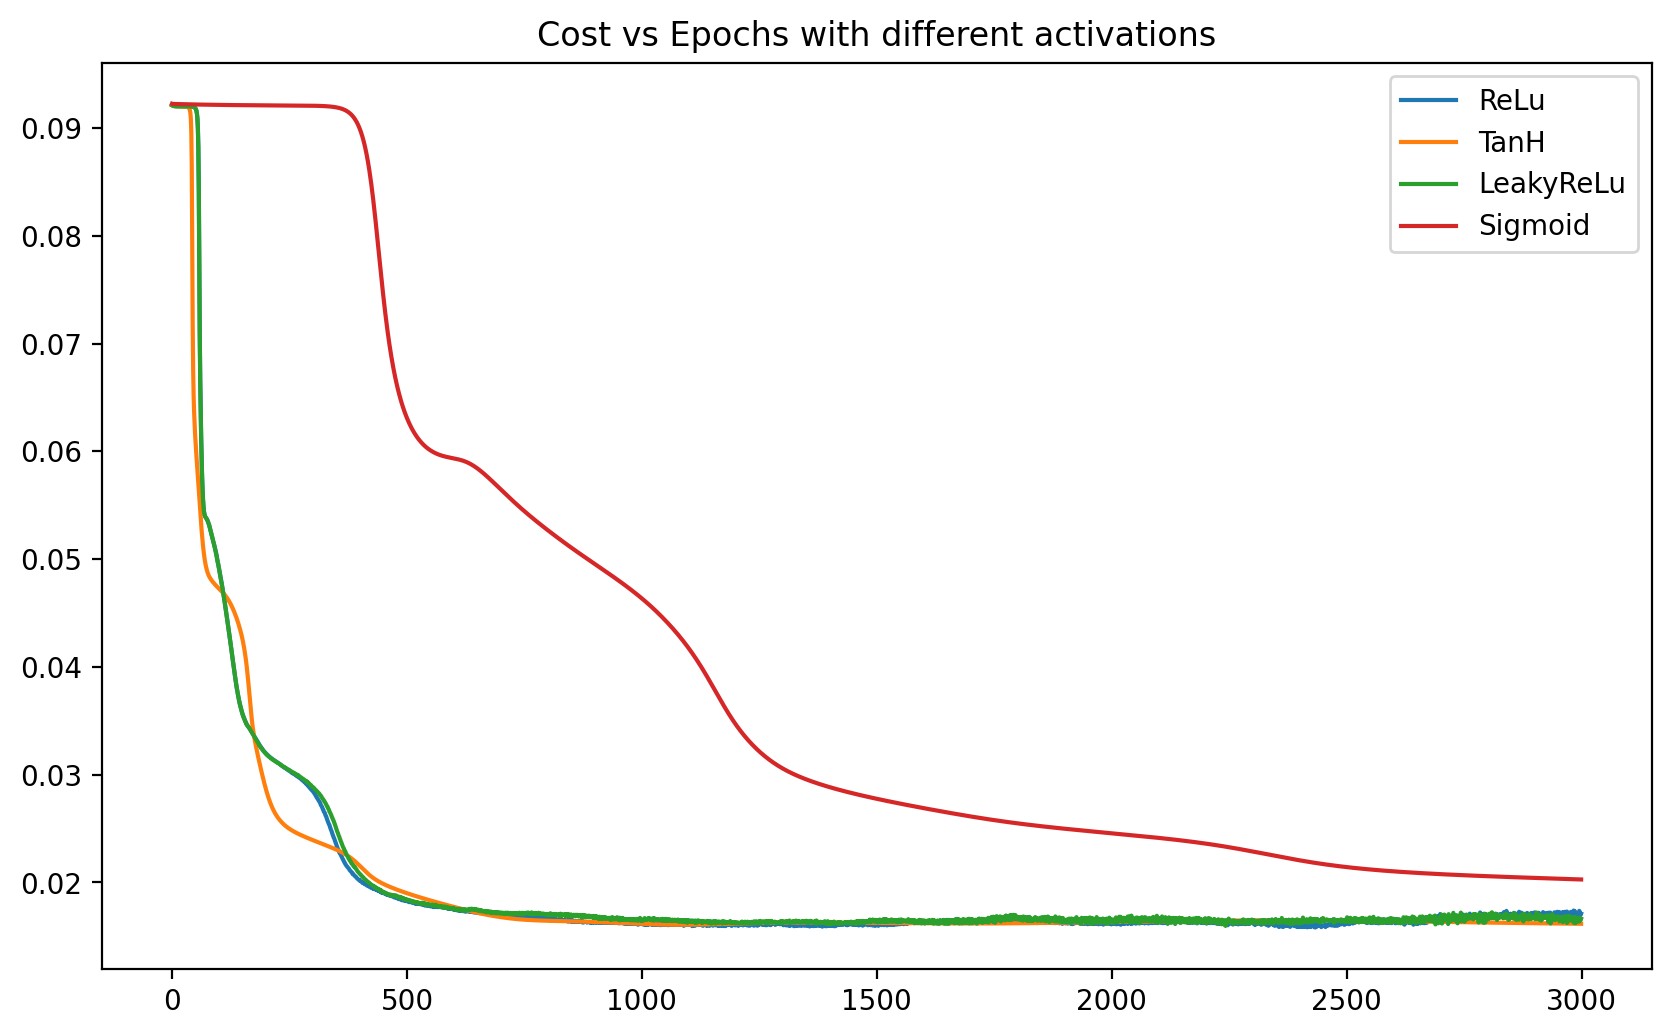

In [27]:
for i in range(len(activations)):
    plt.plot(totalCosts_2[i])
plt.legend(activations)
plt.title('Cost vs Epochs with different activations')
plt.show()

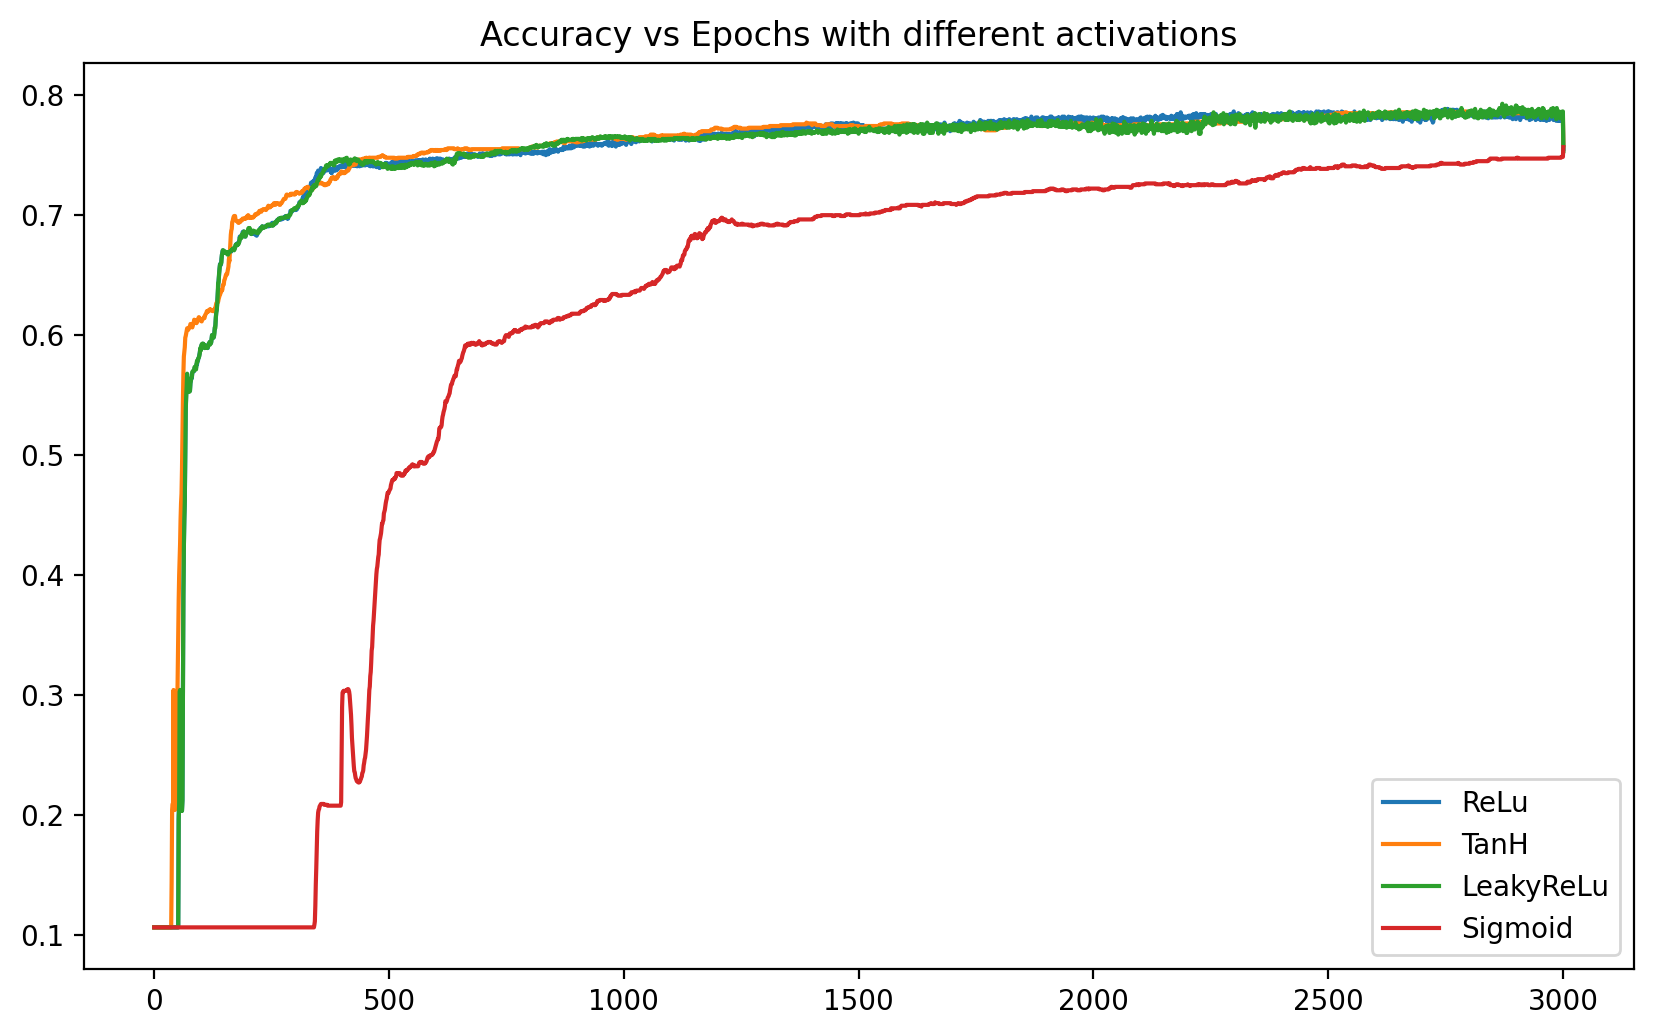

In [28]:
for i in range(len(activations)):
    plt.plot(totalAcc_2[i])
plt.legend(activations)
plt.title('Accuracy vs Epochs with different activations')
plt.show()

In [12]:
epochs = [300, 500, 800, 1000, 1500, 1800, 2000, 2500, 3000, 3500, 4000, 8000, 10000, 15000, 20000]
totalAcc_3 = []
totalCosts_3 = []
for epoch in epochs:
    ARCHITECTURE_3 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : 0.13,
        'epochs' : epoch,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL3 = DNN(ARCHITECTURE_3['layer_dims'], lRate=ARCHITECTURE_3['lRate'], epochs=ARCHITECTURE_3['epochs']
    ,activation=ARCHITECTURE_3['activation'], initializer=ARCHITECTURE_3['initializer'],
    GD_type=ARCHITECTURE_3['GD_type'], batch_size=ARCHITECTURE_3['batch_size'],
    optimizer=ARCHITECTURE_3['optimizer'], momentum=ARCHITECTURE_3['momentum'],
    regularizer=ARCHITECTURE_3['Regularizer'], regularizer_const=ARCHITECTURE_3['Regularizer_const'])


    costs, acc = MODEL3.fit(X_train, y_train, print_cost=False)
    totalCosts_3.append(costs)
    totalAcc_3.append(acc)
    train_acc = MODEL3.accuracy(X_train, y_train)
    test_acc = MODEL3.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_3, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7564285714285715
Test Acc : 0.7783333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7628571428571429
Test Acc : 0.7683333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7621428571428571
Test Acc : 0.7766666666666666
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7664285714285715
Test Acc : 0.7733333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b

In [29]:
for i in range(len(epochs[:])):
    plt.plot(totalCosts_3[i])
plt.legend(epochs[:])
plt.title('Cost vs Epochs with different values of epochs')
plt.show()

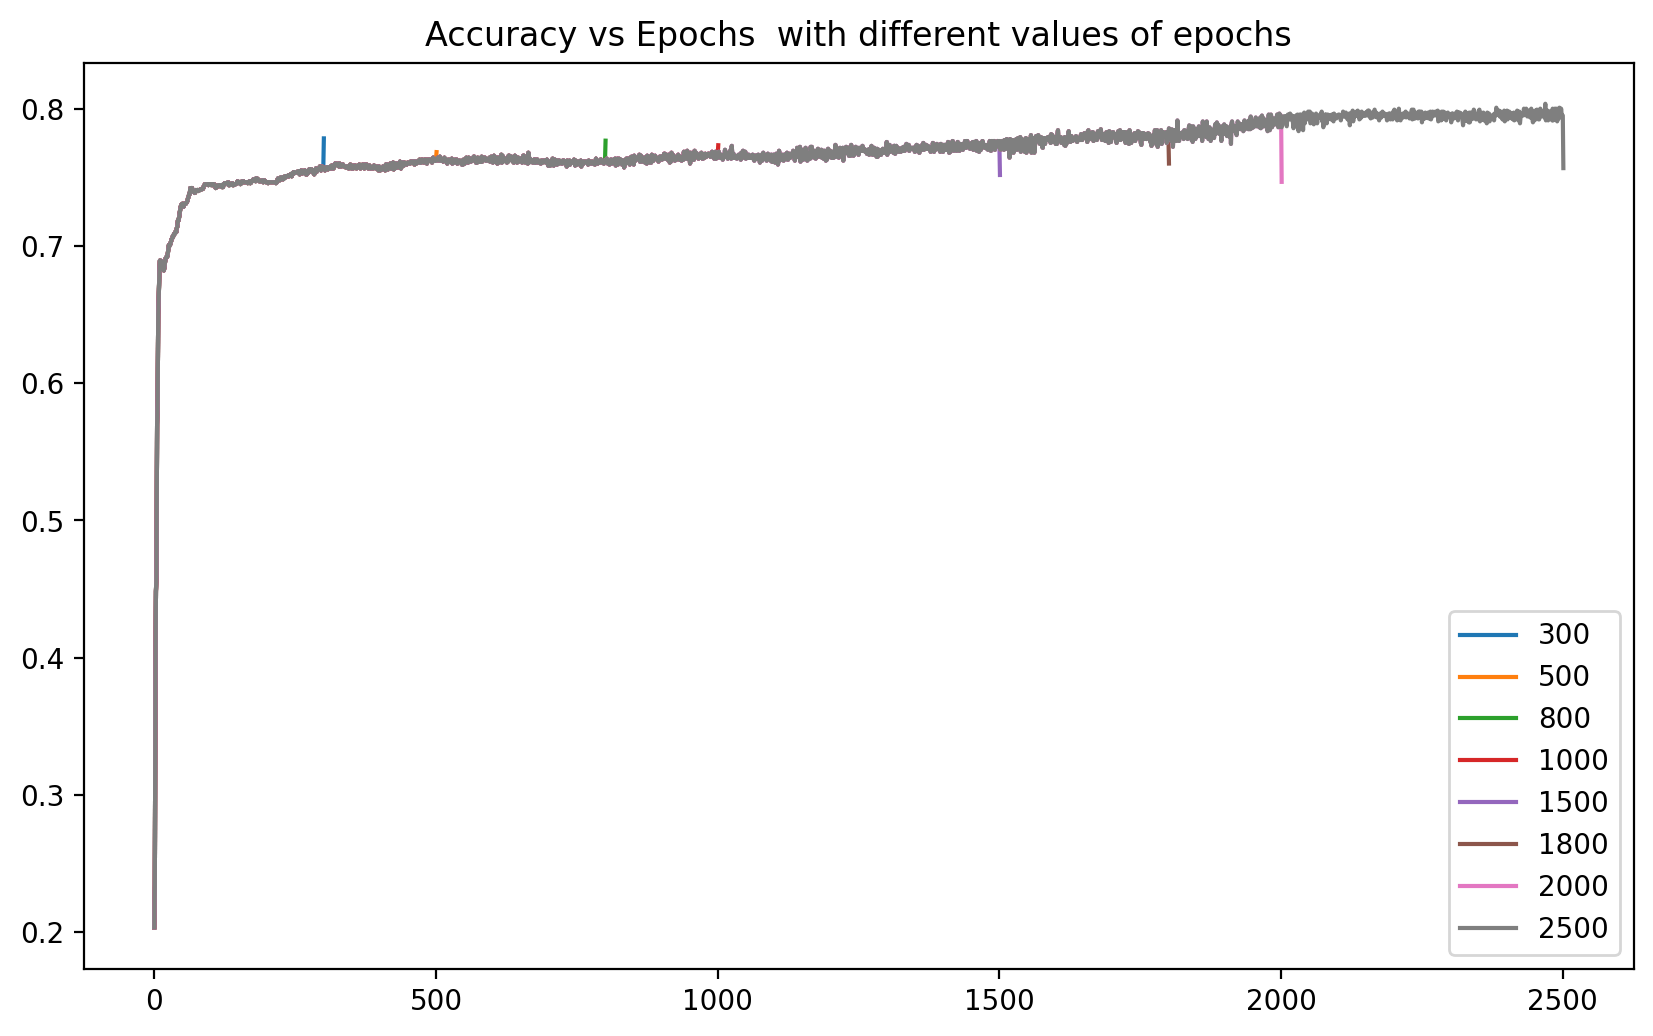

In [30]:
for i in range(len(epochs[:-7])):
    plt.plot(totalAcc_3[i])
plt.legend(epochs[:-7])
plt.title('Accuracy vs Epochs  with different values of epochs')
plt.show()

In [15]:
learning_rates1 = [0.01, 0.09, 0.1, 0.3, 0.19, 0.2, 0.25, 0.3]
totalAcc_4 = []
totalCosts_4 = []
for le in learning_rates1:
    ARCHITECTURE_4 = {
        'layer_dims' : [X_train.shape[0], 64, y_train.shape[0]],
        'lRate' : le,
        'epochs' : 150,
        'activation' : 'LeakyReLu',
        'initializer' : 'He',
        'GD_type' : 'StochasticGD',
        'batch_size' : None,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL4 = DNN(ARCHITECTURE_4['layer_dims'], lRate=ARCHITECTURE_4['lRate'], epochs=ARCHITECTURE_4['epochs']
    ,activation=ARCHITECTURE_4['activation'], initializer=ARCHITECTURE_4['initializer'],
    GD_type=ARCHITECTURE_4['GD_type'], batch_size=ARCHITECTURE_4['batch_size'],
    optimizer=ARCHITECTURE_4['optimizer'], momentum=ARCHITECTURE_4['momentum'],
    regularizer=ARCHITECTURE_4['Regularizer'], regularizer_const=ARCHITECTURE_4['Regularizer_const'])


    costs, acc = MODEL4.fit(X_train, y_train, print_cost=False)
    totalCosts_4.append(costs)
    totalAcc_4.append(acc)
    train_acc = MODEL4.accuracy(X_train, y_train)
    test_acc = MODEL4.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_4, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.7421428571428571
Test Acc : 0.7566666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6385714285714286
Test Acc : 0.6233333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6314285714285715
Test Acc : 0.6233333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6707142857142857
Test Acc : 0.665
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6878571428571428
Test Acc : 0.6683333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.7064285714285714
Test Acc : 0.71
('Layer 1 W shape : (64, 6)', 'b shape : (6

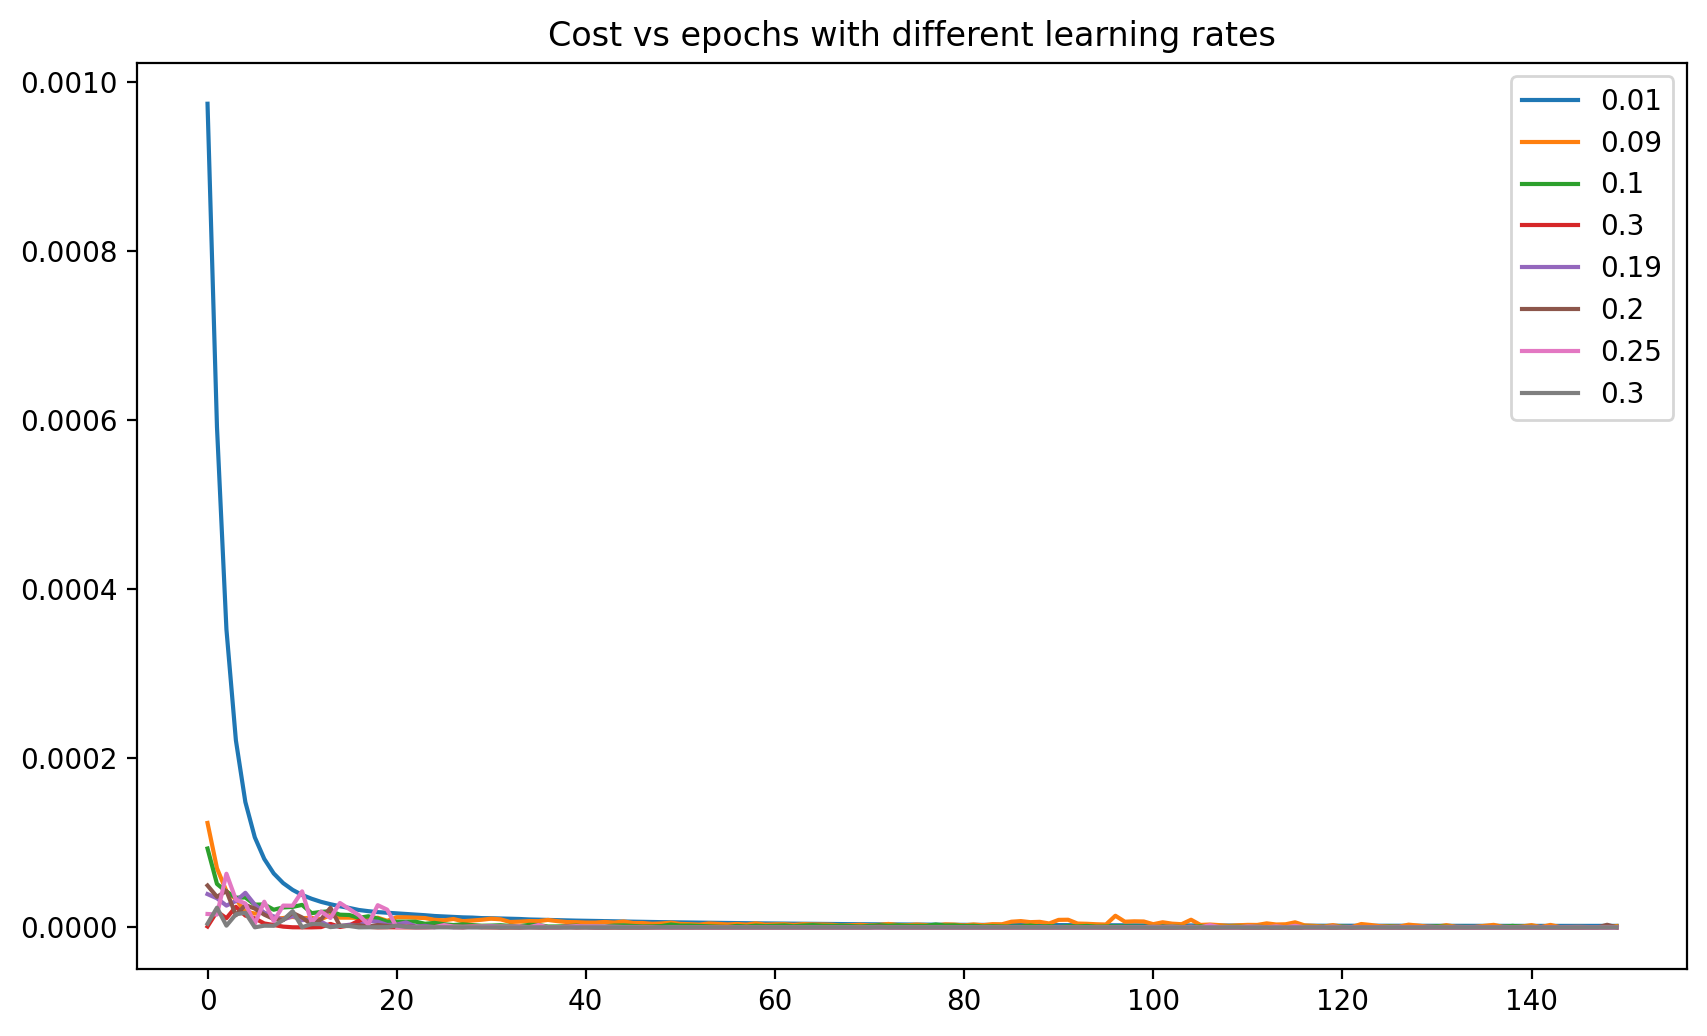

In [31]:
for i in range(len(learning_rates1)):
    plt.plot(totalCosts_4[i])
plt.legend(learning_rates1)
plt.title('Cost vs epochs with different learning rates')
plt.show()

In [32]:
for i in range(len(learning_rates1)):
    plt.plot(totalAcc_4[i])
plt.legend(learning_rates1)
plt.title('Accuracy vs epochs with different learning rates')
plt.show()

In [18]:
epochs2 = [10, 20, 40, 70, 100, 150, 200, 250, 300, 400, 500]
totalAcc_5 = []
totalCosts_5 = []
for epoch in epochs2:
    ARCHITECTURE_4 = {
        'layer_dims' : [X_train.shape[0], 64, y_train.shape[0]],
        'lRate' : le,
        'epochs' : 150,
        'activation' : 'LeakyReLu',
        'initializer' : 'He',
        'GD_type' : 'StochasticGD',
        'batch_size' : None,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL4 = DNN(ARCHITECTURE_4['layer_dims'], lRate=ARCHITECTURE_4['lRate'], epochs=ARCHITECTURE_4['epochs']
    ,activation=ARCHITECTURE_4['activation'], initializer=ARCHITECTURE_4['initializer'],
    GD_type=ARCHITECTURE_4['GD_type'], batch_size=ARCHITECTURE_4['batch_size'],
    optimizer=ARCHITECTURE_4['optimizer'], momentum=ARCHITECTURE_4['momentum'],
    regularizer=ARCHITECTURE_4['Regularizer'], regularizer_const=ARCHITECTURE_4['Regularizer_const'])


    costs, acc = MODEL4.fit(X_train, y_train, print_cost=False)
    totalCosts_5.append(costs)
    totalAcc_5.append(acc)
    train_acc = MODEL4.accuracy(X_train, y_train)
    test_acc = MODEL4.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_4, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6135714285714285
Test Acc : 0.59
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6357142857142857
Test Acc : 0.6283333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6321428571428571
Test Acc : 0.62
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6528571428571428
Test Acc : 0.6566666666666666
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6671428571428571
Test Acc : 0.66
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (10, 64)', 'b shape : (10, 1)')
Train Acc : 0.6164285714285714
Test Acc : 0.6016666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer

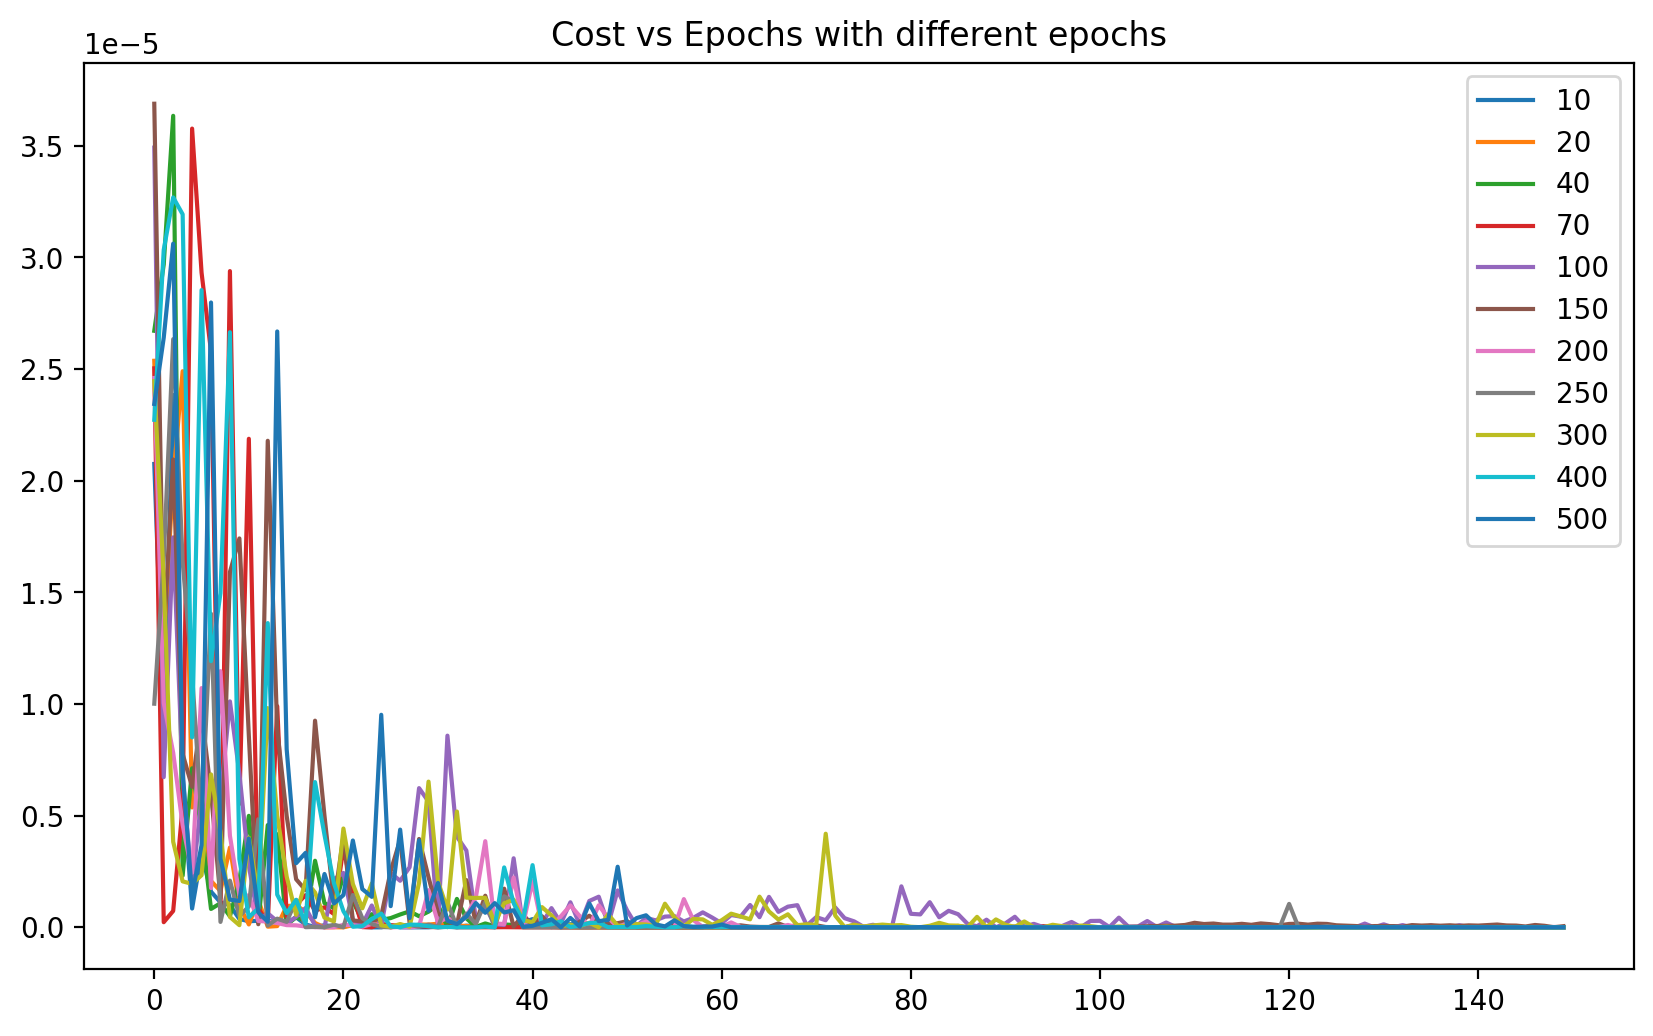

In [33]:
for i in range(len(epochs2)):
    plt.plot(totalCosts_5[i])
plt.legend(epochs2)
plt.title('Cost vs Epochs with different epochs')
plt.show()

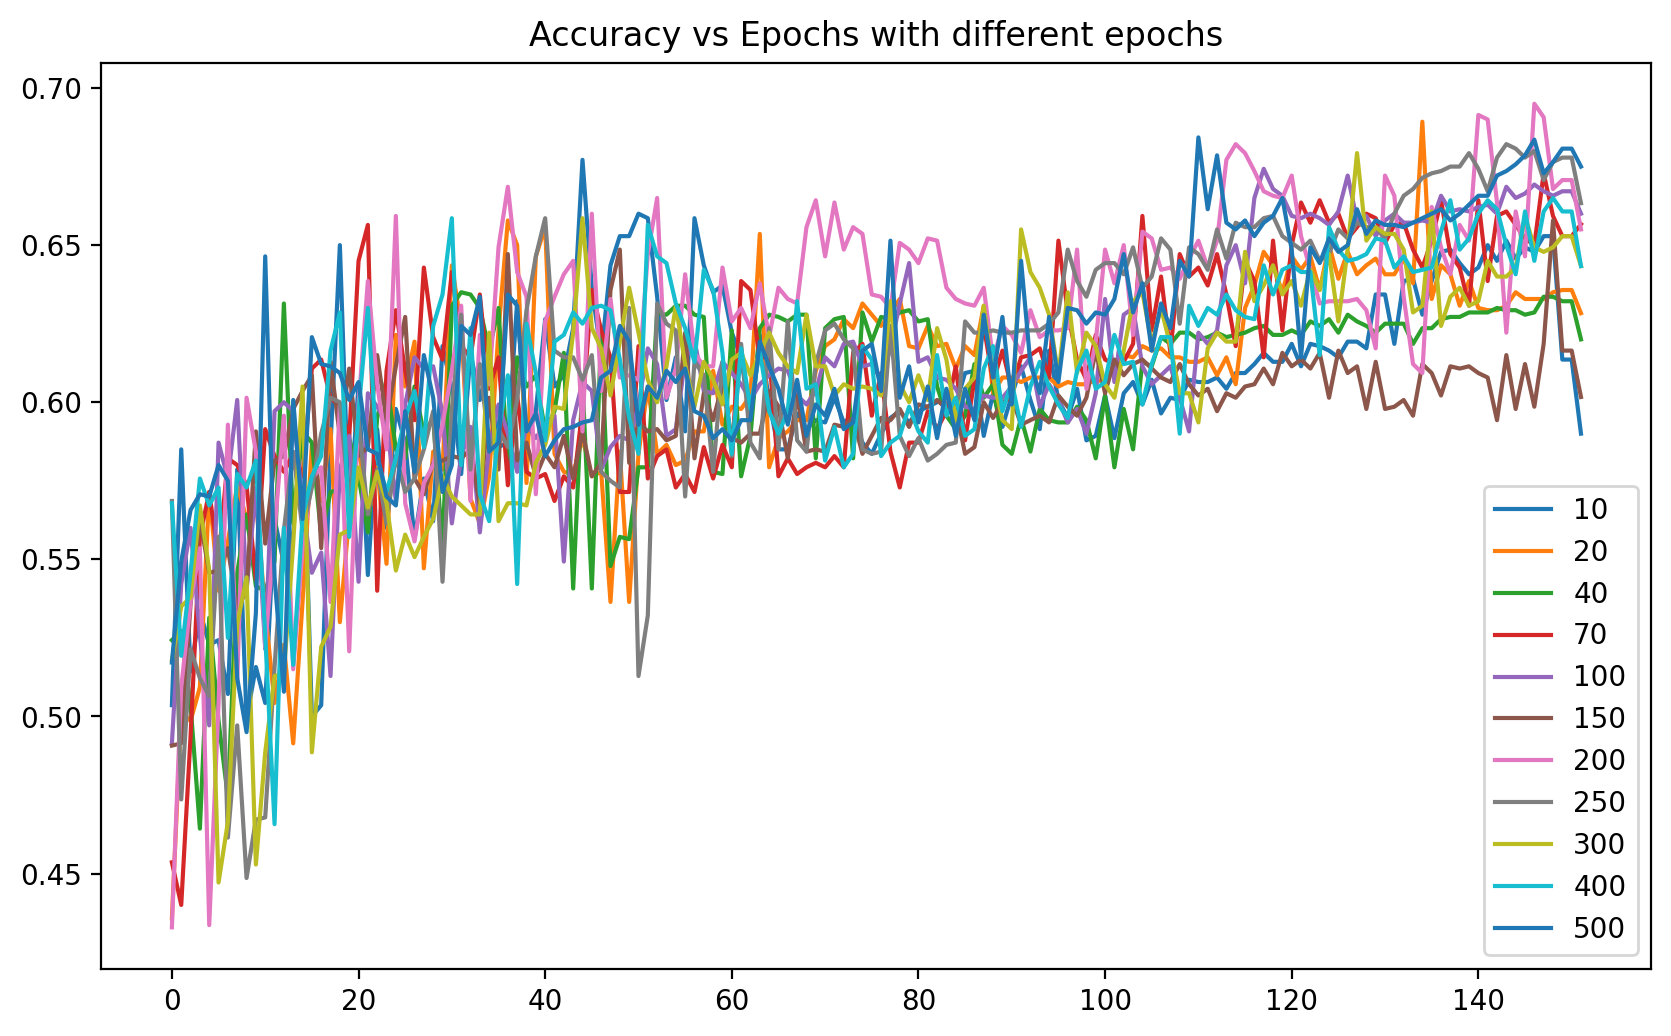

In [34]:
for i in range(len(epochs2)):
    plt.plot(totalAcc_5[i])
plt.legend(epochs2)
plt.title('Accuracy vs Epochs with different epochs')
plt.show()

In [21]:
learning_rates2 = [0.01, 0.09, 0.1, 0.3, 0.19, 0.2, 0.25, 0.3]
totalAcc_6 = []
totalCosts_6 = []
for le in learning_rates1:
    ARCHITECTURE_4 = {
        'layer_dims' : [X_train.shape[0], 50, y_train.shape[0]],
        'lRate' : le,
        'epochs' : 2500,
        'activation' : 'LeakyReLu',
        'initializer' : 'He',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL4 = DNN(ARCHITECTURE_4['layer_dims'], lRate=ARCHITECTURE_4['lRate'], epochs=ARCHITECTURE_4['epochs']
    ,activation=ARCHITECTURE_4['activation'], initializer=ARCHITECTURE_4['initializer'],
    GD_type=ARCHITECTURE_4['GD_type'], batch_size=ARCHITECTURE_4['batch_size'],
    optimizer=ARCHITECTURE_4['optimizer'], momentum=ARCHITECTURE_4['momentum'],
    regularizer=ARCHITECTURE_4['Regularizer'], regularizer_const=ARCHITECTURE_4['Regularizer_const'])


    costs, acc = MODEL4.fit(X_train, y_train, print_cost=True)
    totalCosts_6.append(costs)
    totalAcc_6.append(acc)
    train_acc = MODEL4.accuracy(X_train, y_train)
    test_acc = MODEL4.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_4, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (50, 6)', 'b shape : (50, 1)')
('Layer 2 W shape : (10, 50)', 'b shape : (10, 1)')
Cost after iteration0: 0.09086764412984004
Cost after iteration50: 0.06145638006498505
Cost after iteration100: 0.05061625929618608
Cost after iteration150: 0.043455253720781344
Cost after iteration200: 0.03870792132488072
Cost after iteration250: 0.035582315536041714
Cost after iteration300: 0.03351514257722717
Cost after iteration350: 0.03208402305490009
Cost after iteration400: 0.031033545209488294
Cost after iteration450: 0.03021406192695242
Cost after iteration500: 0.029547992731769068
Cost after iteration550: 0.028979628168456496
Cost after iteration600: 0.02848005052263203
Cost after iteration650: 0.028030360027744138
Cost after iteration700: 0.02762086734733067
Cost after iteration750: 0.02724194235985483
Cost after iteration800: 0.026889610674793434
Cost after iteration850: 0.02655711984255876
Cost after iteration900: 0.0262421876204387
Cost after iteration950: 0.025941497766

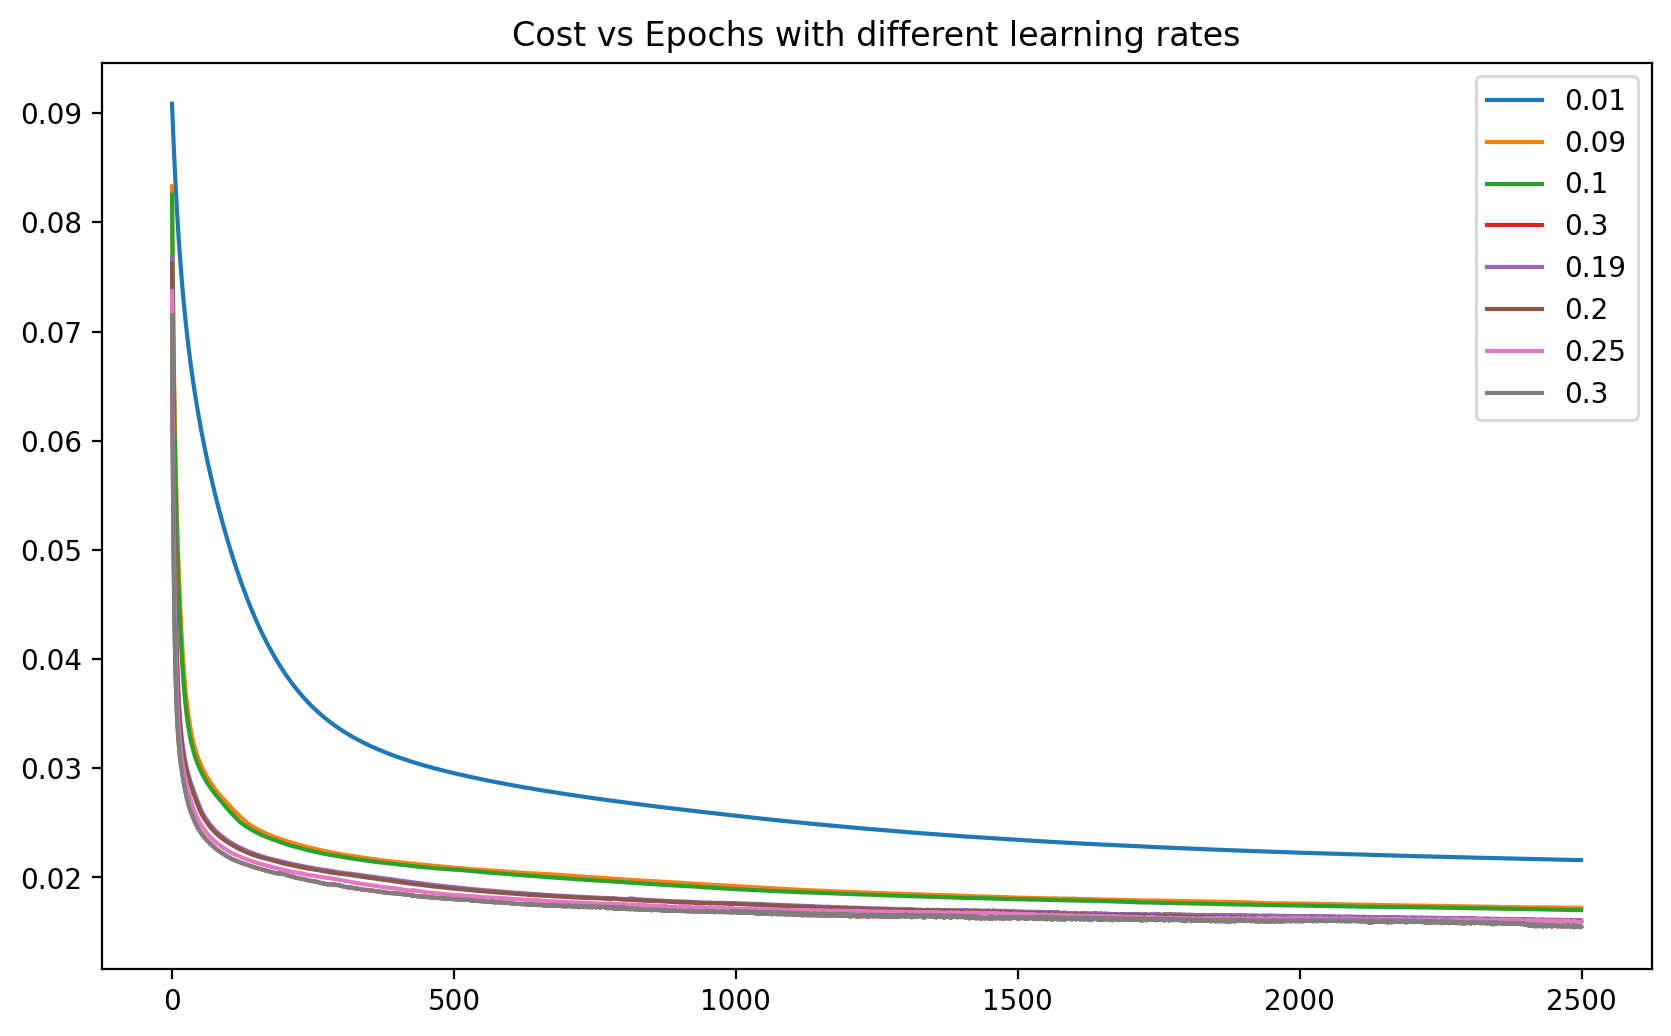

In [35]:
for i in range(len(learning_rates2)):
    plt.plot(totalCosts_6[i])
plt.legend(learning_rates2)
plt.title('Cost vs Epochs with different learning rates')
plt.show()

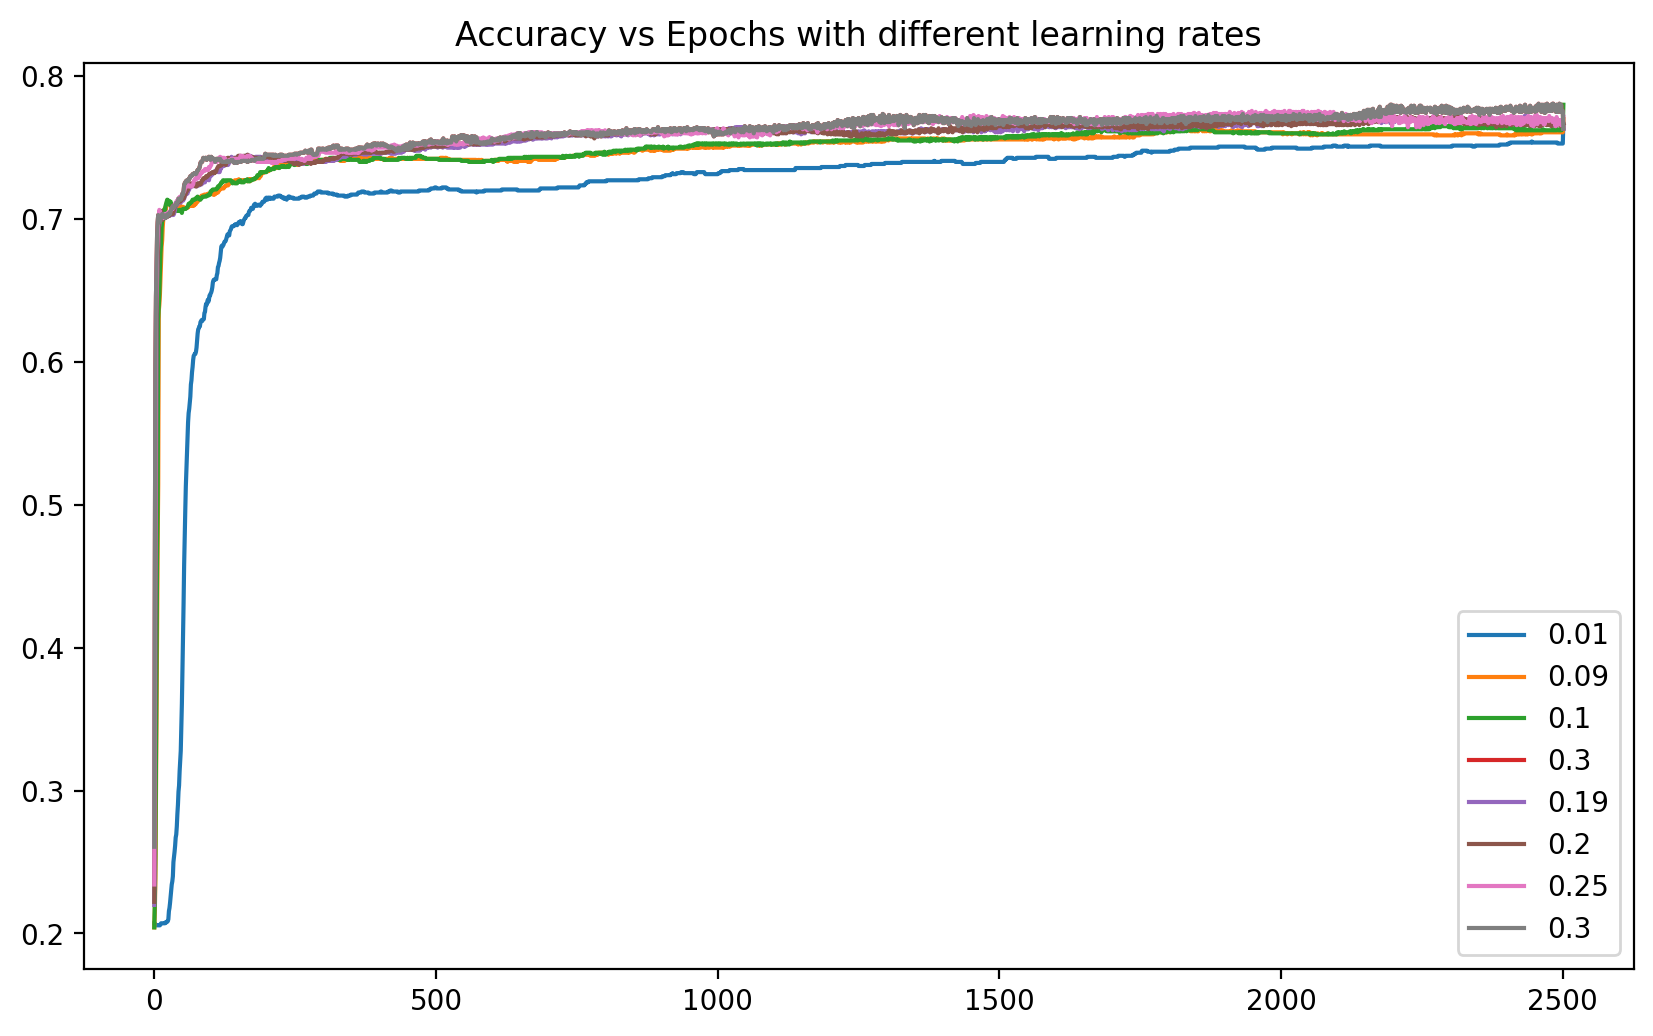

In [36]:
for i in range(len(learning_rates2)):
    plt.plot(totalAcc_6[i])
plt.legend(learning_rates2)
plt.title('Accuracy vs Epochs with different learning rates')
plt.show()

In [24]:
learning_rates3 = [0.001, 0.01, 0.05, 0.09, 0.1, 0.13, 0.2, 0.25, 0.3]
totalCosts7 = []
totalAcc7 = []
for lr in learning_rates3:
    ARCHITECTURE_7 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : lr,
        'epochs' : 500,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'StochasticGD',
        'batch_size' : None,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL7 = DNN(ARCHITECTURE_7['layer_dims'], lRate=ARCHITECTURE_7['lRate'], epochs=ARCHITECTURE_7['epochs']
    ,activation=ARCHITECTURE_7['activation'], initializer=ARCHITECTURE_7['initializer'],
    GD_type=ARCHITECTURE_7['GD_type'], batch_size=ARCHITECTURE_7['batch_size'],
    optimizer=ARCHITECTURE_7['optimizer'], momentum=ARCHITECTURE_7['momentum'],
    regularizer=ARCHITECTURE_7['Regularizer'], regularizer_const=ARCHITECTURE_7['Regularizer_const'])


    costs, acc = MODEL7.fit(X_train, y_train, print_cost=False)
    totalCosts7.append(costs)
    totalAcc7.append(acc)
    train_acc = MODEL7.accuracy(X_train, y_train)
    test_acc = MODEL7.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_7, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7514285714285714
Test Acc : 0.765
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7392857142857143
Test Acc : 0.7083333333333334
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7535714285714286
Test Acc : 0.7083333333333334
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.585
Test Acc : 0.58
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.3607142

In [41]:
for i in range(len(learning_rates3[:4])):
    plt.plot(totalCosts7[i])
plt.legend(learning_rates3[:4])
plt.title('Cost vs Epochs with different learning rates')
plt.ylim([0, 0.000075])
plt.show()

In [42]:
for i in range(len(learning_rates3[:4])):
    plt.plot(totalAcc7[i])
plt.legend(learning_rates3[:4])
plt.title('Accuracy vs Epochs with different learning rates')
plt.show()